In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

%matplotlib inline

In [2]:
current_path = os.getcwd()
fileMobilidade1 = '\\2020_BR_Region_Mobility_Report.csv'
dataMobilidade1 = pd.read_csv(current_path + fileMobilidade1)
fileMobilidade2 = '\\2021_BR_Region_Mobility_Report.csv'
dataMobilidade2 = pd.read_csv(current_path + fileMobilidade2)
frames = [dataMobilidade1, dataMobilidade2]
dataMobilidade = pd.concat(frames)
fileCOVID = '\\COVID.xlsx'
dataCOVID = pd.read_excel(current_path + fileCOVID)

C:\Users\neiva\anaconda3\envs\unsupervisedLearning\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataMobilidade = dataMobilidade[dataMobilidade.sub_region_2 == "Niterói"]
dataCOVID = dataCOVID[dataCOVID.municipio_res == "NITEROI                                           "]
dataCOVID['dt_coleta_dt_notif'] =pd.to_datetime(dataCOVID['dt_coleta_dt_notif'])
dataMobilidade['date'] = pd.to_datetime(dataMobilidade['date'])


In [4]:
dataMobilidade.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
357423,BR,Brazil,State of Rio de Janeiro,Niterói,NaN,NaN,NaN,ChIJQaITF9GAmQAR1akUZgTMuUo,2020-02-15,12.0,7.0,28.0,28.0,8.0,-2.0
357424,BR,Brazil,State of Rio de Janeiro,Niterói,NaN,NaN,NaN,ChIJQaITF9GAmQAR1akUZgTMuUo,2020-02-16,4.0,4.0,26.0,27.0,-1.0,1.0
357425,BR,Brazil,State of Rio de Janeiro,Niterói,NaN,NaN,NaN,ChIJQaITF9GAmQAR1akUZgTMuUo,2020-02-17,5.0,10.0,-3.0,26.0,22.0,-3.0
357426,BR,Brazil,State of Rio de Janeiro,Niterói,NaN,NaN,NaN,ChIJQaITF9GAmQAR1akUZgTMuUo,2020-02-18,3.0,1.0,13.0,16.0,15.0,-3.0
357427,BR,Brazil,State of Rio de Janeiro,Niterói,NaN,NaN,NaN,ChIJQaITF9GAmQAR1akUZgTMuUo,2020-02-19,5.0,9.0,1.0,17.0,15.0,-3.0


In [5]:
dataCOVID.head()

,sexo,idade,municipio_res,uf,dt_sintoma,dt_coleta_dt_notif,classificacao,evolucao,dt_obito,comorbidade,dias,dt_evento,bairro,cep
381244,M,NaN,NITEROI ...,RJ,2020/09/17 00:00:00.000,2020-09-23,CONFIRMADO,NaN,NaN,NaN,199.0,2020/09/17 00:00:00.000,NaN,NaN
381245,M,NaN,NITEROI ...,RJ,2020/12/16 00:00:00.000,2020-12-16,CONFIRMADO,NaN,NaN,NaN,109.0,2020/12/16 00:00:00.000,NaN,NaN
381246,M,69.0,NITEROI ...,RJ,2020/10/25 00:00:00.000,2020-11-04,CONFIRMADO,NaN,NaN,NaN,161.0,2020/10/25 00:00:00.000,NaN,NaN
381247,M,NaN,NITEROI ...,RJ,2021/01/13 00:00:00.000,2021-02-04,CONFIRMADO,NaN,NaN,NaN,81.0,2021/01/13 00:00:00.000,NaN,NaN
381248,M,NaN,NITEROI ...,RJ,2020/06/24 00:00:00.000,2020-06-28,CONFIRMADO,NaN,NaN,NaN,284.0,2020/06/24 00:00:00.000,NaN,NaN


In [6]:
dataCOVID['dt_coleta_dt_notif'].max()

Timestamp('2021-03-27 00:00:00')

In [7]:
DSseries = dataCOVID['dt_coleta_dt_notif'].value_counts().sort_index()
DSseries

2020-03-15     1
2020-03-16     1
2020-03-18     1
2020-03-20     3
2020-03-23     4
              ..
2021-03-23    81
2021-03-24    59
2021-03-25    54
2021-03-26    62
2021-03-27    11
Name: dt_coleta_dt_notif, Length: 374, dtype: int64

In [8]:
dataframe = pd.DataFrame(DSseries)
rolling_mean = dataMobilidade.residential_percent_change_from_baseline.rolling(window=7).mean()
rolling_mean2 = dataframe.dt_coleta_dt_notif.rolling(window=7).mean()

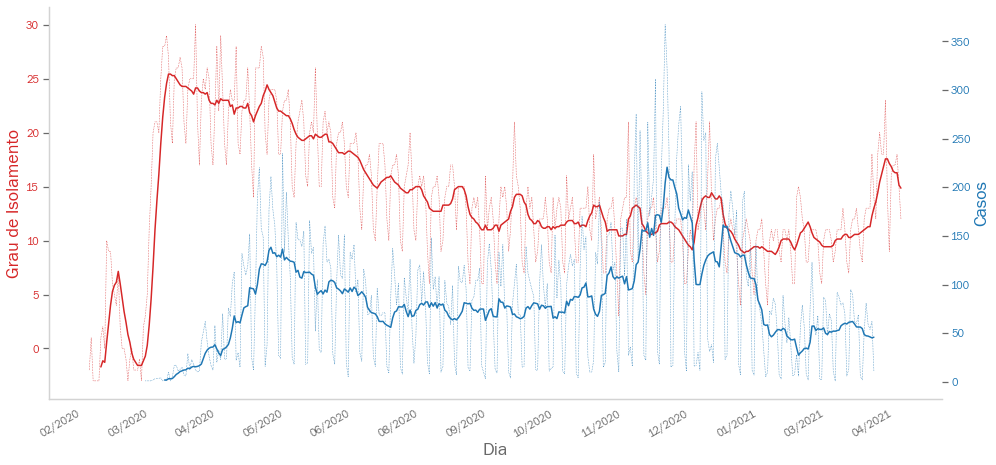

In [9]:
datesA = matplotlib.dates.date2num(dataMobilidade.date)
datesB = matplotlib.dates.date2num(DSseries.index)

fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:red'
ax1.set_xlabel('Dia')
ax1.set_ylabel('Grau de Isolamento', color=color)
ax1.plot(datesA, dataMobilidade.residential_percent_change_from_baseline, color=color, linestyle=":", linewidth=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(datesA, rolling_mean, color=color, label="Média movel % residencial Niterói")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Casos', color=color)  # we already handled the x-label with ax1
ax2.plot(datesB, dataframe.dt_coleta_dt_notif, color=color, linestyle=":", linewidth=0.6)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(datesB, rolling_mean2, color=color, label="Média movel Niterói")

ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.xaxis.set_major_formatter(DateFormatter("%m/%Y"))
fig.autofmt_xdate(rotation=30)

 # otherwise the right y-label is slightly clipped
plt.show()

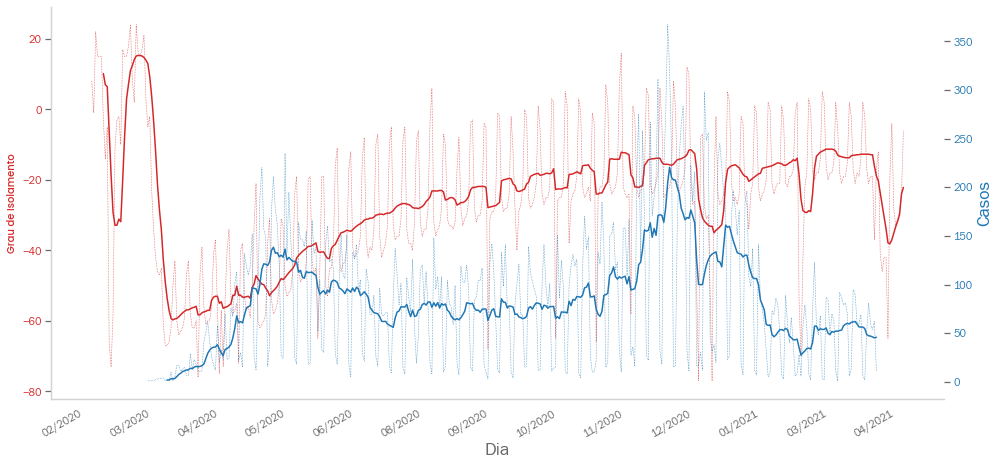

In [10]:
dataframe = pd.DataFrame(DSseries)
rolling_mean = dataMobilidade.workplaces_percent_change_from_baseline.rolling(window=7).mean()
rolling_mean2 = dataframe.dt_coleta_dt_notif.rolling(window=7).mean()

datesA = matplotlib.dates.date2num(dataMobilidade.date)
datesB = matplotlib.dates.date2num(DSseries.index)

fpath = os.path.join(rcParams["datapath"], "fonts/ttf/Poppins-Medium.ttf")
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:red'
ax1.set_xlabel('Dia')
ax1.set_ylabel('Grau de Isolamento', color=color, fontproperties=prop)
ax1.plot(datesA, dataMobilidade.workplaces_percent_change_from_baseline, color=color, linestyle=":", linewidth=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(datesA, rolling_mean, color=color, label="Média movel residencial Niterói")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Casos', color=color)  # we already handled the x-label with ax1
ax2.plot(datesB, dataframe.dt_coleta_dt_notif, color=color, linestyle=":", linewidth=0.6)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(datesB, rolling_mean2, color=color, label="Média movel Niterói")

ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.xaxis.set_major_formatter(DateFormatter("%m/%Y"))
fig.autofmt_xdate(rotation=30)

 # otherwise the right y-label is slightly clipped
plt.show()

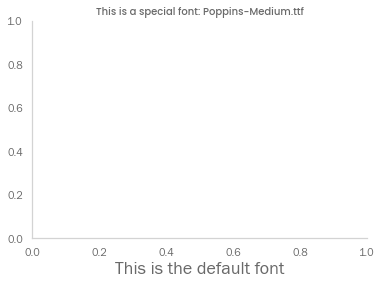

In [11]:
fig, ax = plt.subplots()

fpath = os.path.join(rcParams["datapath"], "fonts/ttf/Poppins-Medium.ttf")
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
ax.set_title('This is a special font: {}'.format(fname), fontproperties=prop)
ax.set_xlabel('This is the default font')

plt.show()

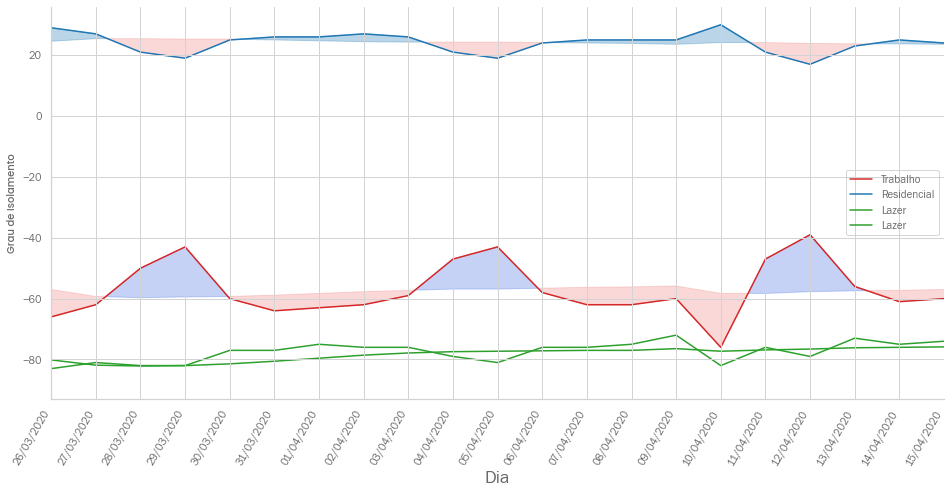

In [19]:
rolling_meanA = dataMobilidade.workplaces_percent_change_from_baseline.rolling(window=7).mean()
rolling_meanB = dataMobilidade.residential_percent_change_from_baseline.rolling(window=7).mean()
rolling_meanC = dataMobilidade.retail_and_recreation_percent_change_from_baseline.rolling(window=7).mean()
rolling_meanD = dataMobilidade.grocery_and_pharmacy_percent_change_from_baseline.rolling(window=7).mean()
rolling_meanE = dataMobilidade.parks_percent_change_from_baseline.rolling(window=7).mean()
rolling_meanF = dataMobilidade.transit_stations_percent_change_from_baseline.rolling(window=7).mean()

datesA = matplotlib.dates.date2num(dataMobilidade.date)

fpath = os.path.join(rcParams["datapath"], "fonts/ttf/Poppins-Medium.ttf")
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

fig, ax1 = plt.subplots(figsize=(16, 8), sharex=True)
plt.grid(color="lightgray")

ax1.set_xlabel('Dia')
ax1.set_ylabel('Grau de Isolamento', fontproperties=prop)

color = 'tab:red'

ax1.plot(datesA, dataMobilidade.workplaces_percent_change_from_baseline, color=color, label="Trabalho")
# ax1.plot(datesA, rolling_meanA, color=color, label="Trabalho")
# ax1.fill_between(datesA, rolling_meanA, dataMobilidade.workplaces_percent_change_from_baseline, color="lightcoral")
ax1.fill_between(datesA, rolling_meanA, dataMobilidade.workplaces_percent_change_from_baseline, where=(dataMobilidade.workplaces_percent_change_from_baseline <= rolling_meanA), color="lightcoral", alpha=0.3, interpolate=True)
ax1.fill_between(datesA, rolling_meanA, dataMobilidade.workplaces_percent_change_from_baseline, where=(dataMobilidade.workplaces_percent_change_from_baseline >= rolling_meanA), color="royalblue", alpha=0.3, interpolate=True)

color = 'tab:blue'
ax1.plot(datesA, dataMobilidade.residential_percent_change_from_baseline, color=color, label="Residencial")
# ax1.plot(datesA, rolling_meanB, color=color, label="Residencial")
# ax1.fill_between(datesA, rolling_meanB, dataMobilidade.residential_percent_change_from_baseline, color="silver")
ax1.fill_between(datesA, rolling_meanB, dataMobilidade.residential_percent_change_from_baseline, where=(dataMobilidade.residential_percent_change_from_baseline <= rolling_meanB), color="lightcoral", alpha=0.3, interpolate=True)
ax1.fill_between(datesA, rolling_meanB, dataMobilidade.residential_percent_change_from_baseline, where=(dataMobilidade.residential_percent_change_from_baseline >= rolling_meanB), color=color, alpha=0.3, interpolate=True)

color = 'tab:green'
ax1.plot(datesA, dataMobilidade.retail_and_recreation_percent_change_from_baseline, color=color, label="Lazer")
ax1.plot(datesA, rolling_meanC, color=color, label="Lazer")

color = 'tab:purple'
# ax1.plot(datesA, dataMobilidade.grocery_and_pharmacy_percent_change_from_baseline, color=color, label="Mercados")
# ax1.plot(datesA, rolling_meanD, color=color, label="Mercados")

# color = 'tab:orange'
# ax1.plot(datesA, dataMobilidade.parks_percent_change_from_baseline, color=color, label="Parques")
# ax1.plot(datesA, rolling_meanE, color=color, label="Parques")

# color = 'tab:pink'
# ax1.plot(datesA, dataMobilidade.transit_stations_percent_change_from_baseline, color=color, label="Pontos")
# ax1.plot(datesA, rolling_meanF, color=color, label="Pontos")

dBase =  datetime.date(2020, 3, 26)
delta = datetime.timedelta(days=20)
a = dBase+delta
dArray = [dBase,a]

fig.autofmt_xdate()
ax1.set_xlim(dArray)

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))
fig.autofmt_xdate(rotation=60)

 # otherwise the right y-label is slightly clipped
ax1.legend()
plt.show()